In [1]:
import pandas as pd

df = pd.read_csv("water_potability.csv")  # or the exact name you saved
print(df.head())
print(df.info())
print(df["Potability"].value_counts())


         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  -

Head:
          ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count 

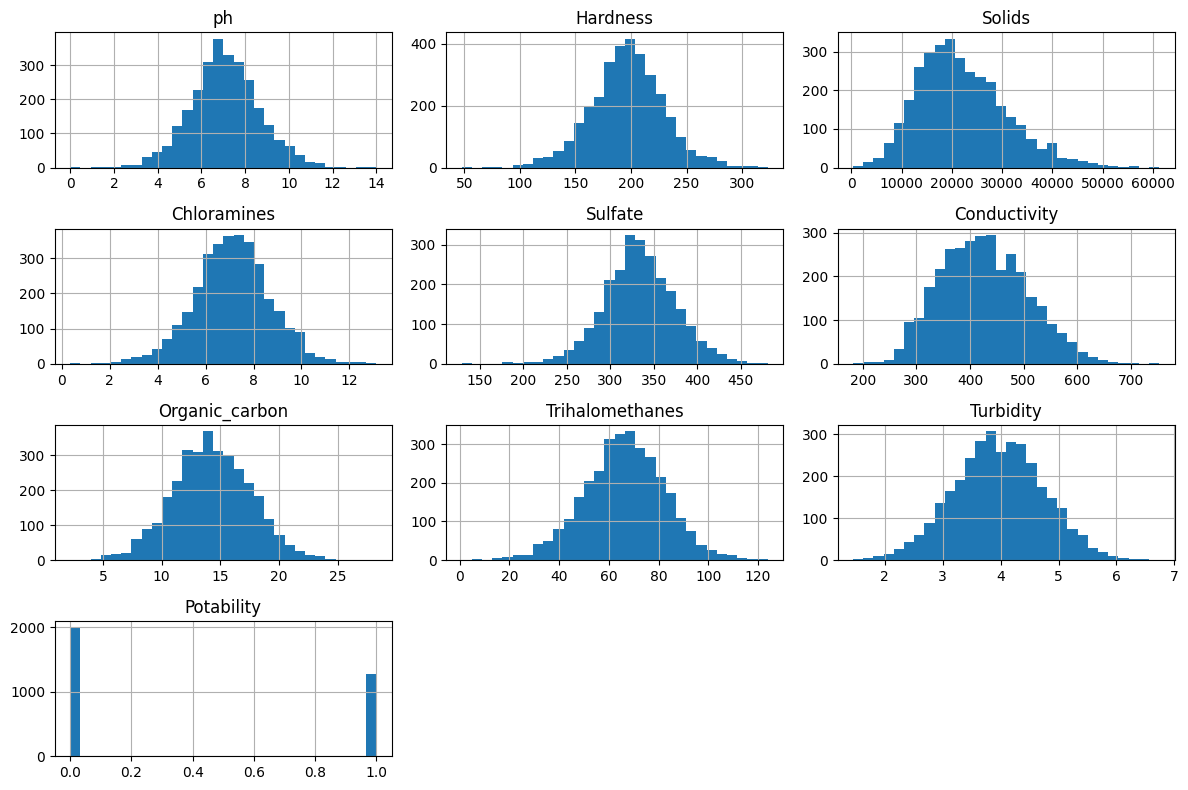

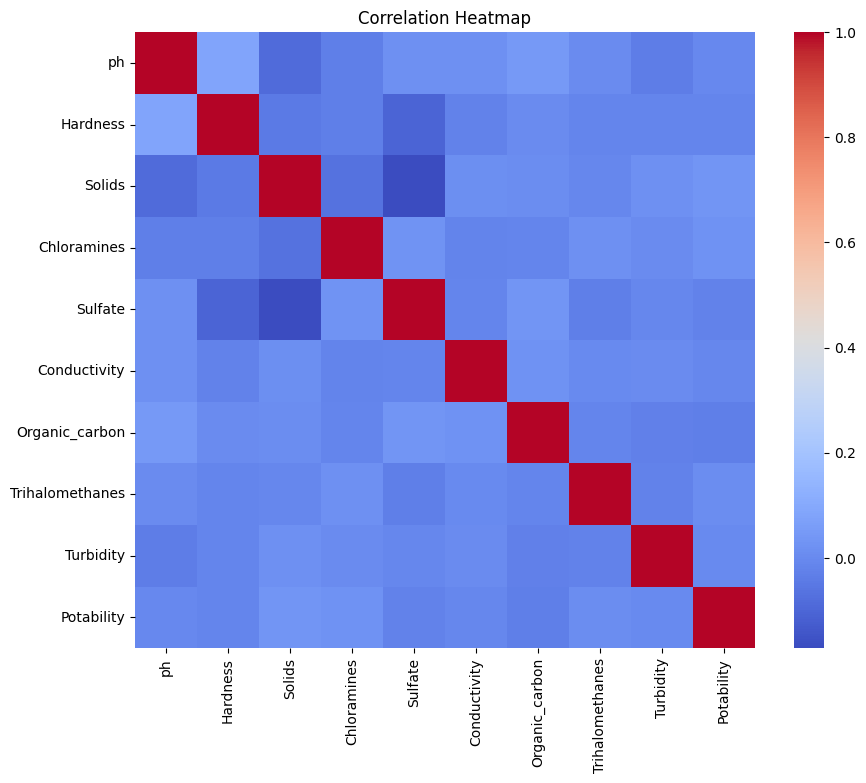


=== Logistic Regression ===
Accuracy: 0.6097560975609756
ROC-AUC: 0.548115234375
Classification report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656



/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

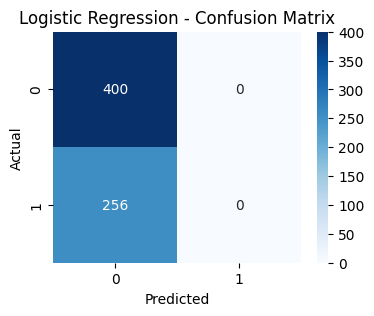

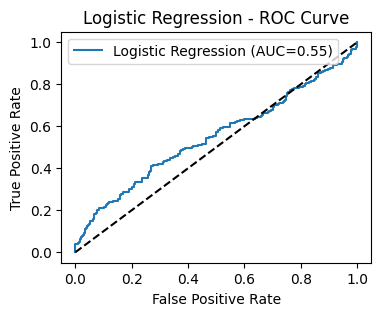


=== Decision Tree ===
Accuracy: 0.5960365853658537
ROC-AUC: 0.5703125
Classification report:
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       400
           1       0.48      0.45      0.47       256

    accuracy                           0.60       656
   macro avg       0.57      0.57      0.57       656
weighted avg       0.59      0.60      0.59       656



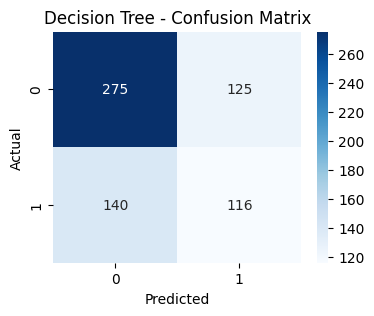

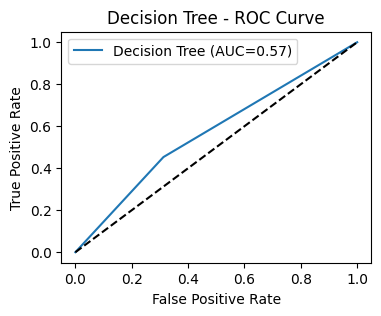


=== Random Forest ===
Accuracy: 0.6615853658536586
ROC-AUC: 0.6532861328125
Classification report:
              precision    recall  f1-score   support

           0       0.67      0.89      0.76       400
           1       0.63      0.31      0.42       256

    accuracy                           0.66       656
   macro avg       0.65      0.60      0.59       656
weighted avg       0.66      0.66      0.63       656



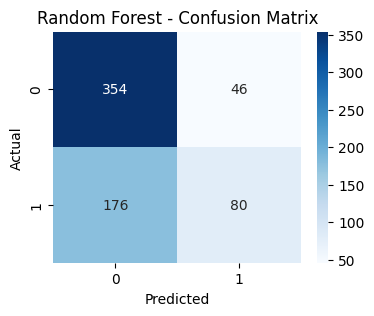

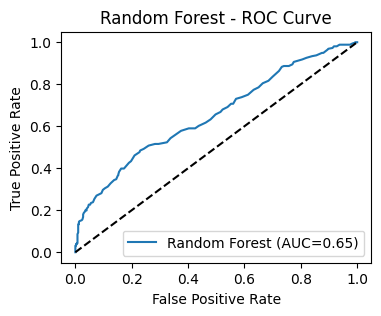


=== SVM ===
Accuracy: 0.6707317073170732
ROC-AUC: 0.6487109375
Classification report:
              precision    recall  f1-score   support

           0       0.66      0.93      0.77       400
           1       0.70      0.27      0.39       256

    accuracy                           0.67       656
   macro avg       0.68      0.60      0.58       656
weighted avg       0.68      0.67      0.62       656



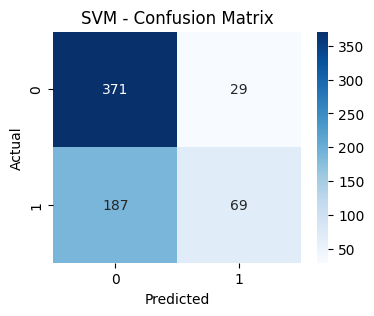

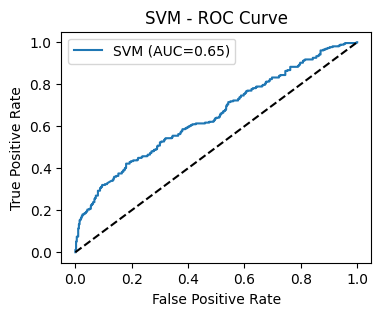


Model performance:
                  Model  Accuracy   ROC_AUC
3                  SVM  0.670732  0.648711
2        Random Forest  0.661585  0.653286
0  Logistic Regression  0.609756  0.548115
1        Decision Tree  0.596037  0.570312

Saved best model as water_potability_model.pkl


In [2]:
# 1. Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib

# 2. Load your CSV
df = pd.read_csv("water_potability.csv")   # put your exact filename here
print("Head:\n", df.head())
print("\nInfo:\n")
print(df.info())
print("\nTarget counts:\n", df["Potability"].value_counts())

# 3. EDA
df.hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 4. Features and target
X = df.drop("Potability", axis=1)
y = df["Potability"]

# 5. Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Preprocessing: impute + scale
numeric_features = X.columns.tolist()
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, numeric_features)]
)

# 7. Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

results = []

# 8. Train, evaluate, plot
for name, clf in models.items():
    model = Pipeline(steps=[("preprocess", preprocessor),
                           ("clf", clf)])
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    print(f"\n=== {name} ===")
    print("Accuracy:", acc)
    print("ROC-AUC:", roc)
    print("Classification report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} - ROC Curve")
    plt.legend()
    plt.show()

    results.append({"Model": name, "Accuracy": acc, "ROC_AUC": roc})

# 9. Compare models
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nModel performance:\n", results_df)

# 10. Train and save best model (Random Forest example)
best_model = Pipeline(steps=[("preprocess", preprocessor),
                             ("clf", RandomForestClassifier(
                                 n_estimators=200, random_state=42
                             ))])
best_model.fit(X, y)
joblib.dump(best_model, "water_potability_model.pkl")
print("\nSaved best model as water_potability_model.pkl")


In [2]:
import pandas as pd

# 1. load your original csv
df = pd.read_csv("water_potability.csv")

# 2. basic cleaning: fill missing numeric values with column medians
df_clean = df.copy()
for col in df_clean.columns:
    if df_clean[col].dtype != "object":
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# 3. save clean dataset for submission
df_clean.to_csv("clean_water_potability.csv", index=False)
print("Saved clean_water_potability.csv")



Saved clean_water_potability.csv
